In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [12]:
diabetes = pd.read_csv("C:/Users/ABHISHEK/Documents/diabetes.csv")
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [13]:
diabetes.head(50)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [14]:
diabetes.shape

(768, 9)

In [15]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [16]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [17]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: xlabel='BloodPressure'>

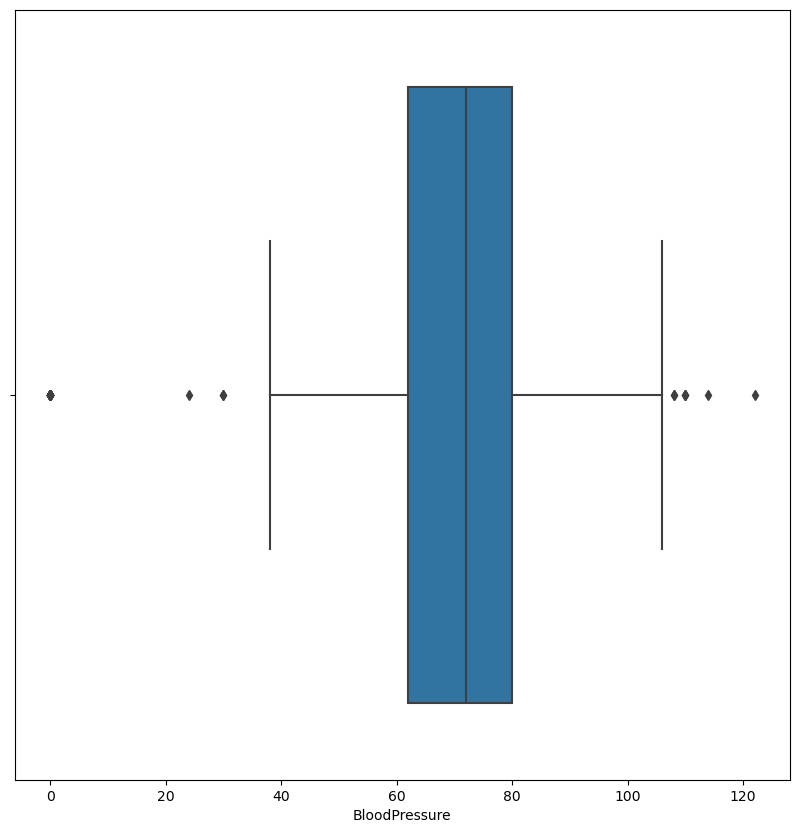

In [18]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(x=diabetes['BloodPressure'], ax=ax)

In [19]:
Q1 = diabetes['Glucose'].quantile(0.25)
Q3 = diabetes['Glucose'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1



# Determine the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
newdata = diabetes[(diabetes['Glucose'] >= lower_bound) & (diabetes['Glucose'] <= upper_bound)]

In [20]:
Q1 = diabetes['SkinThickness'].quantile(0.25)
Q3 = diabetes['SkinThickness'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Determine the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
newdata = diabetes[(diabetes['SkinThickness'] >= lower_bound) & (diabetes['SkinThickness'] <= upper_bound)]



In [21]:
Q1 = diabetes.quantile(0.25)
Q3 = diabetes.quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1




# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a mask for data within the IQR boundaries
mask = ~((diabetes < lower_bound) | (diabetes > upper_bound)).any(axis=1)

# Remove outliers
cleaned_data = diabetes[mask]

<Axes: >

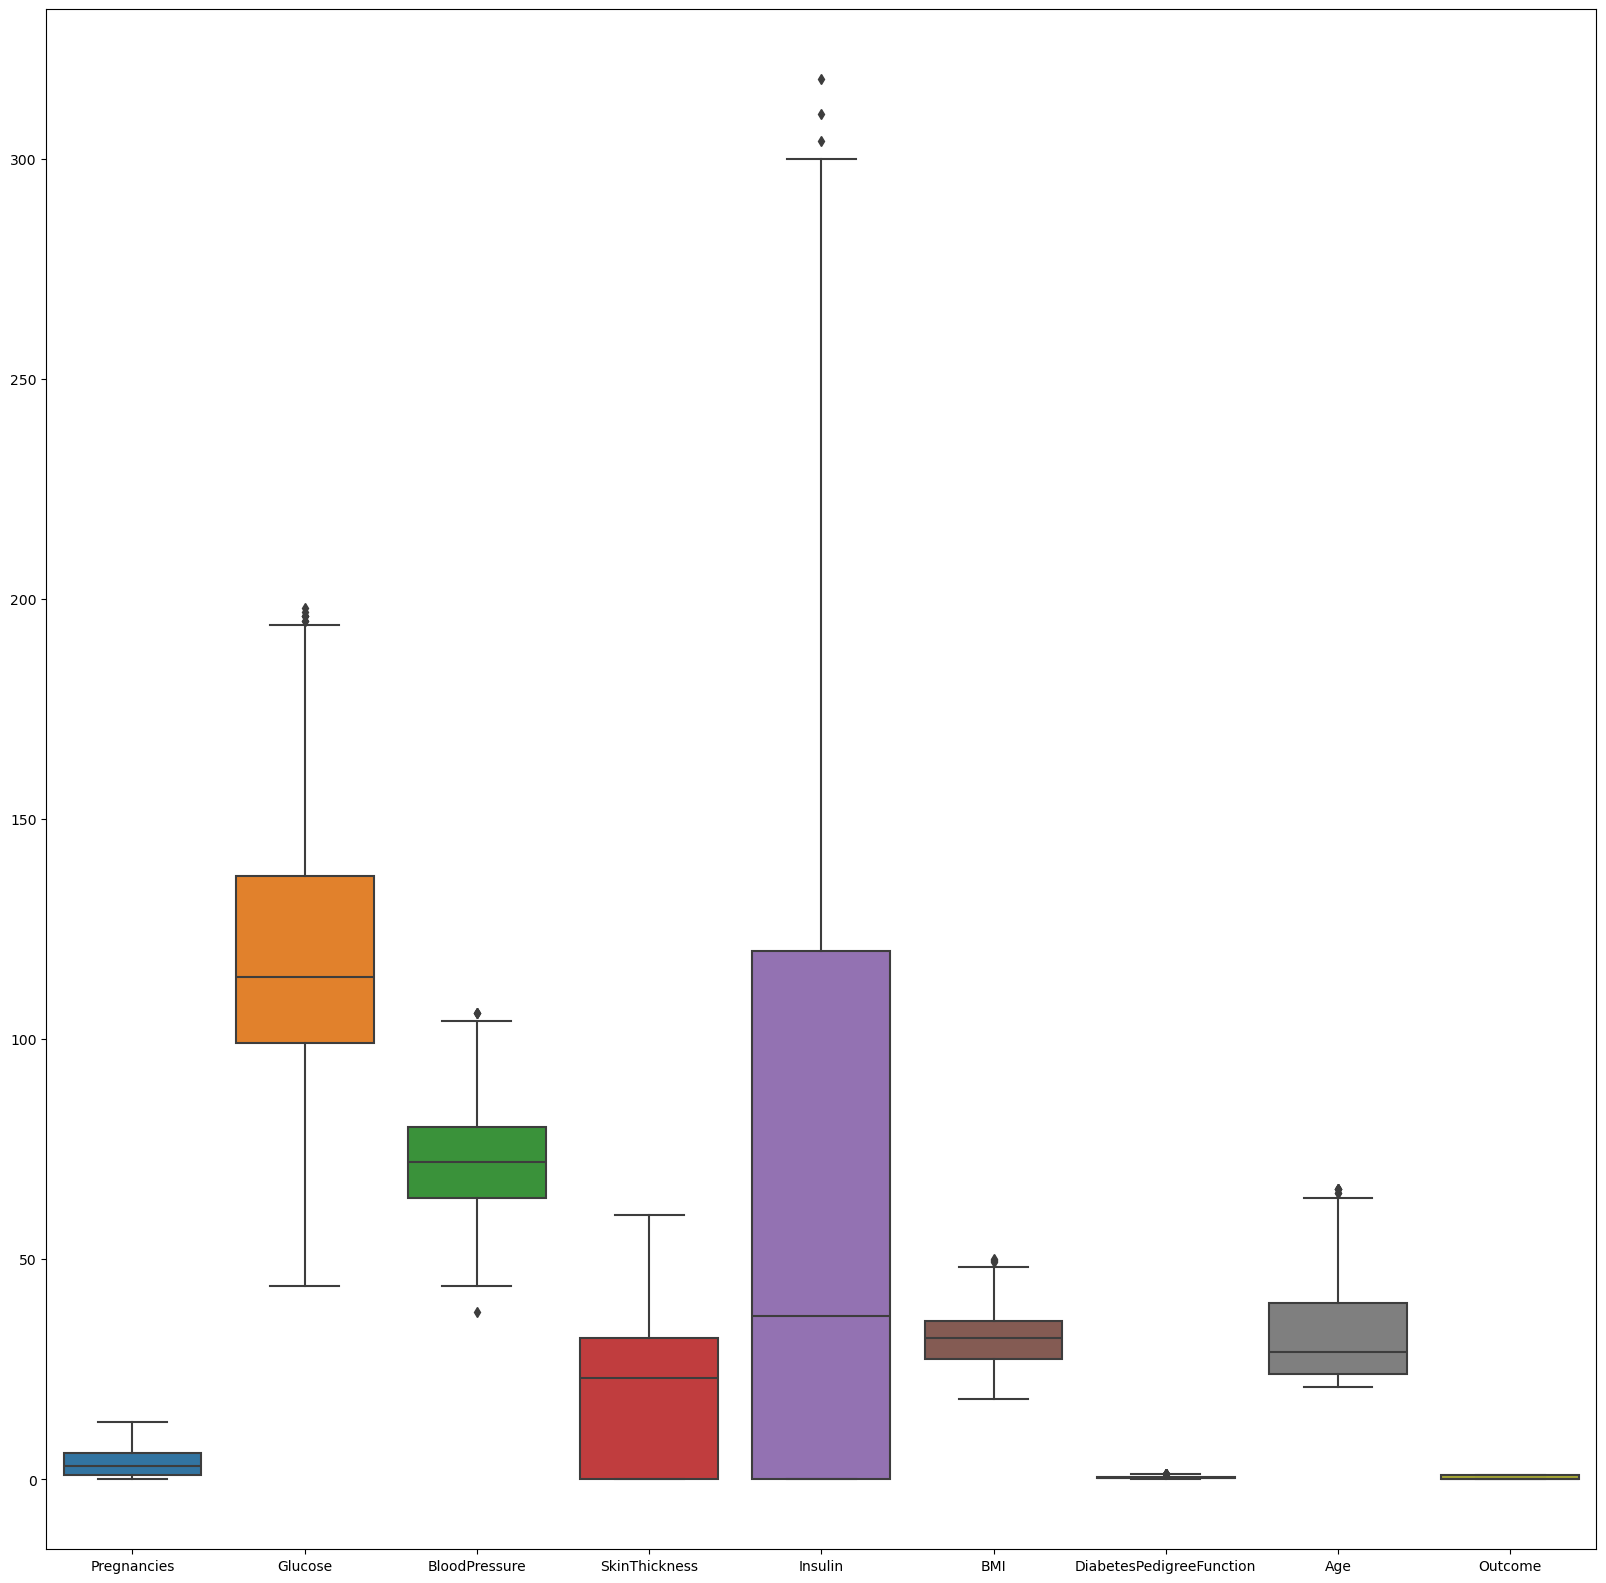

In [22]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.boxplot(cleaned_data, ax=ax)

In [23]:
newdata

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [24]:
cleaned_data['Outcome'].value_counts()

Outcome
0    439
1    200
Name: count, dtype: int64

<Axes: xlabel='Outcome', ylabel='count'>

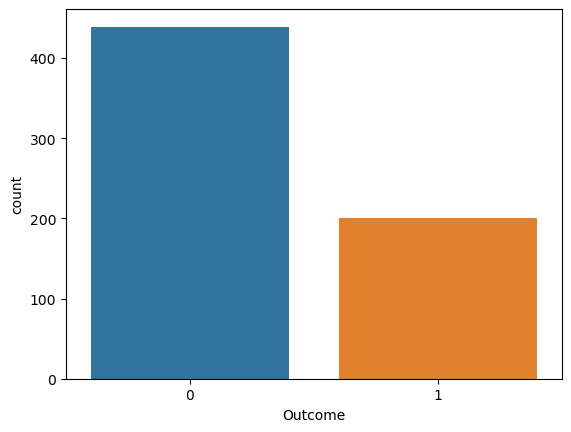

In [25]:
sns.countplot(x = 'Outcome',data=cleaned_data)

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

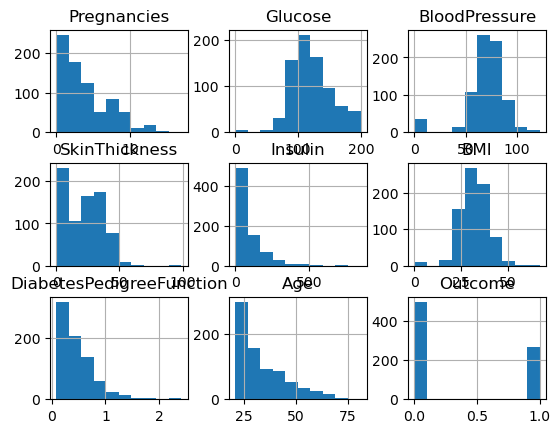

In [26]:
diabetes.hist()

<Axes: xlabel='Outcome', ylabel='BloodPressure'>

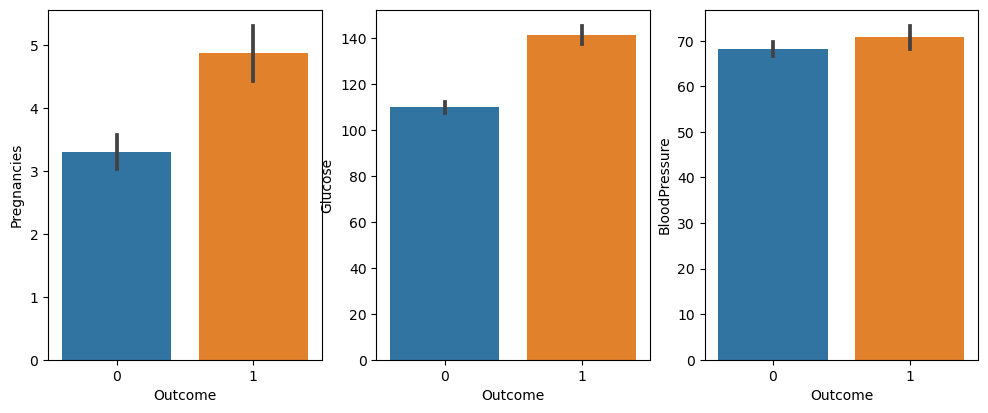

In [27]:
plt.figure(figsize = (12,10))
plt.subplot(2,3,1)
sns.barplot(x = 'Outcome',y ='Pregnancies',data = diabetes)
plt.subplot(2,3,2)
sns.barplot(x = 'Outcome',y ='Glucose',data = diabetes)
plt.subplot(2,3,3)
sns.barplot(x = 'Outcome',y ='BloodPressure',data = diabetes)


<Axes: xlabel='Outcome', ylabel='BMI'>

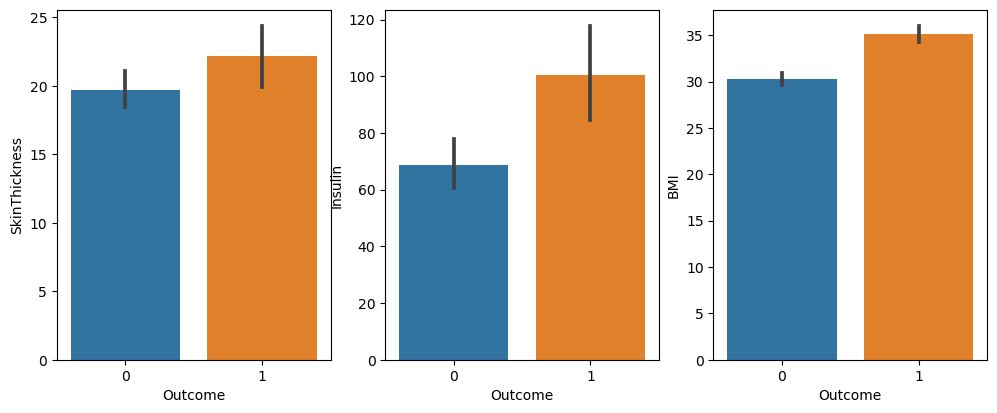

In [28]:
plt.figure(figsize = (12,10))
plt.subplot(2,3,1)
sns.barplot(x = 'Outcome',y ='SkinThickness',data = diabetes)
plt.subplot(2,3,2)
sns.barplot(x = 'Outcome',y ='Insulin',data = diabetes)
plt.subplot(2,3,3)
sns.barplot(x = 'Outcome',y ='BMI',data = diabetes)

<Axes: xlabel='Outcome', ylabel='Age'>

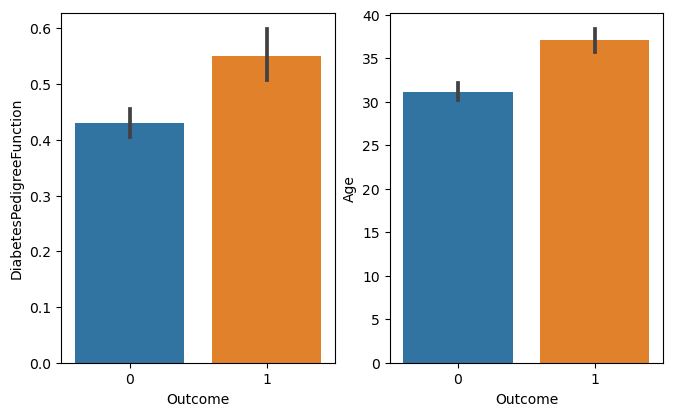

In [29]:
plt.figure(figsize = (12,10))
plt.subplot(2,3,1)
sns.barplot(x = 'Outcome',y ='DiabetesPedigreeFunction',data = diabetes)
plt.subplot(2,3,2)
sns.barplot(x = 'Outcome',y ='Age',data = diabetes)


<Axes: xlabel='Outcome', ylabel='BloodPressure'>

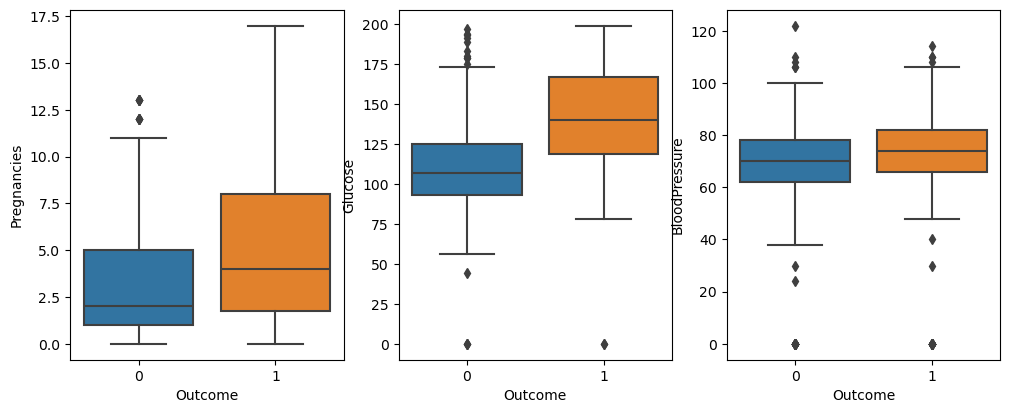

In [30]:
plt.figure(figsize = (12,10))
plt.subplot(2,3,1)
sns.boxplot(x = 'Outcome',y ='Pregnancies',data = diabetes)
plt.subplot(2,3,2)
sns.boxplot(x = 'Outcome',y ='Glucose',data = diabetes)
plt.subplot(2,3,3)
sns.boxplot(x = 'Outcome',y ='BloodPressure',data = diabetes)


<Axes: xlabel='Outcome', ylabel='BMI'>

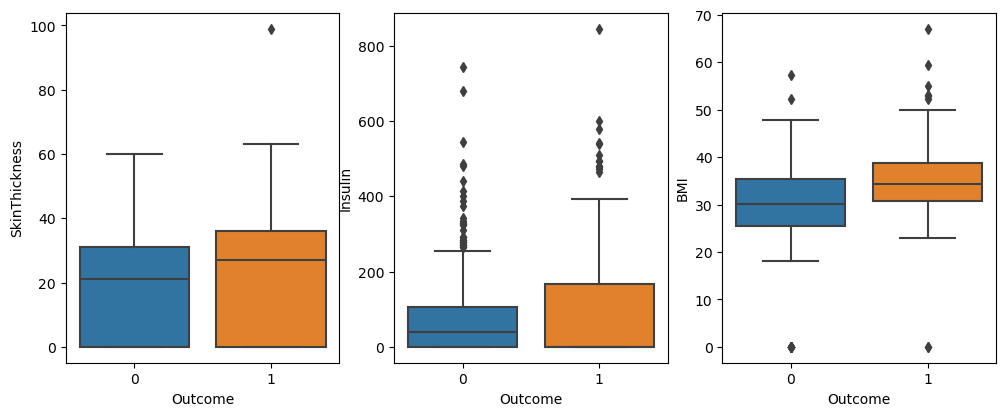

In [31]:
plt.figure(figsize = (12,10))
plt.subplot(2,3,1)
sns.boxplot(x = 'Outcome',y ='SkinThickness',data = diabetes)
plt.subplot(2,3,2)
sns.boxplot(x = 'Outcome',y ='Insulin',data = diabetes)
plt.subplot(2,3,3)
sns.boxplot(x = 'Outcome',y ='BMI',data = diabetes)

<Axes: xlabel='Outcome', ylabel='Age'>

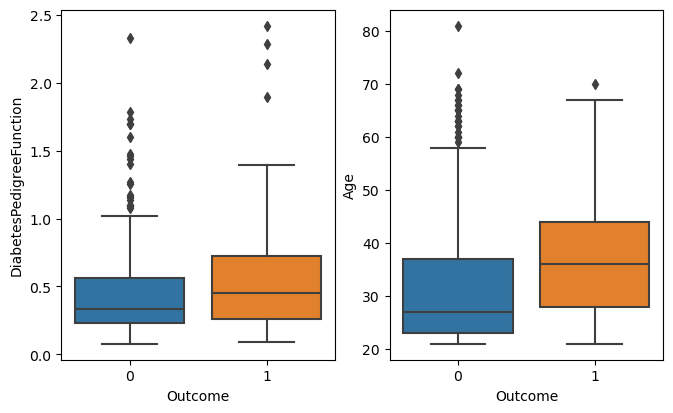

In [32]:
plt.figure(figsize = (12,10))
plt.subplot(2,3,1)
sns.boxplot(x = 'Outcome',y ='DiabetesPedigreeFunction',data = diabetes)
plt.subplot(2,3,2)
sns.boxplot(x = 'Outcome',y ='Age',data = diabetes)

In [33]:
sns.set_style('darkgrid')
numerical_column = diabetes.select_dtypes(include=['int64','float64'])
plt.figure(figsize = 14,len(numerical_column)*3)
for idx,feature in enumerate(numerical_column,1):
    plt.subplot(len(numerical_column),2,idx)
    sns.histplot(diabetes[feature],kde = true)
plt.tight_layout()
plt.show()
    
    

SyntaxError: positional argument follows keyword argument (4274936559.py, line 3)

C:\Users\ABHISHEK\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ABHISHEK\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ABHISHEK\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ABHISHEK\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

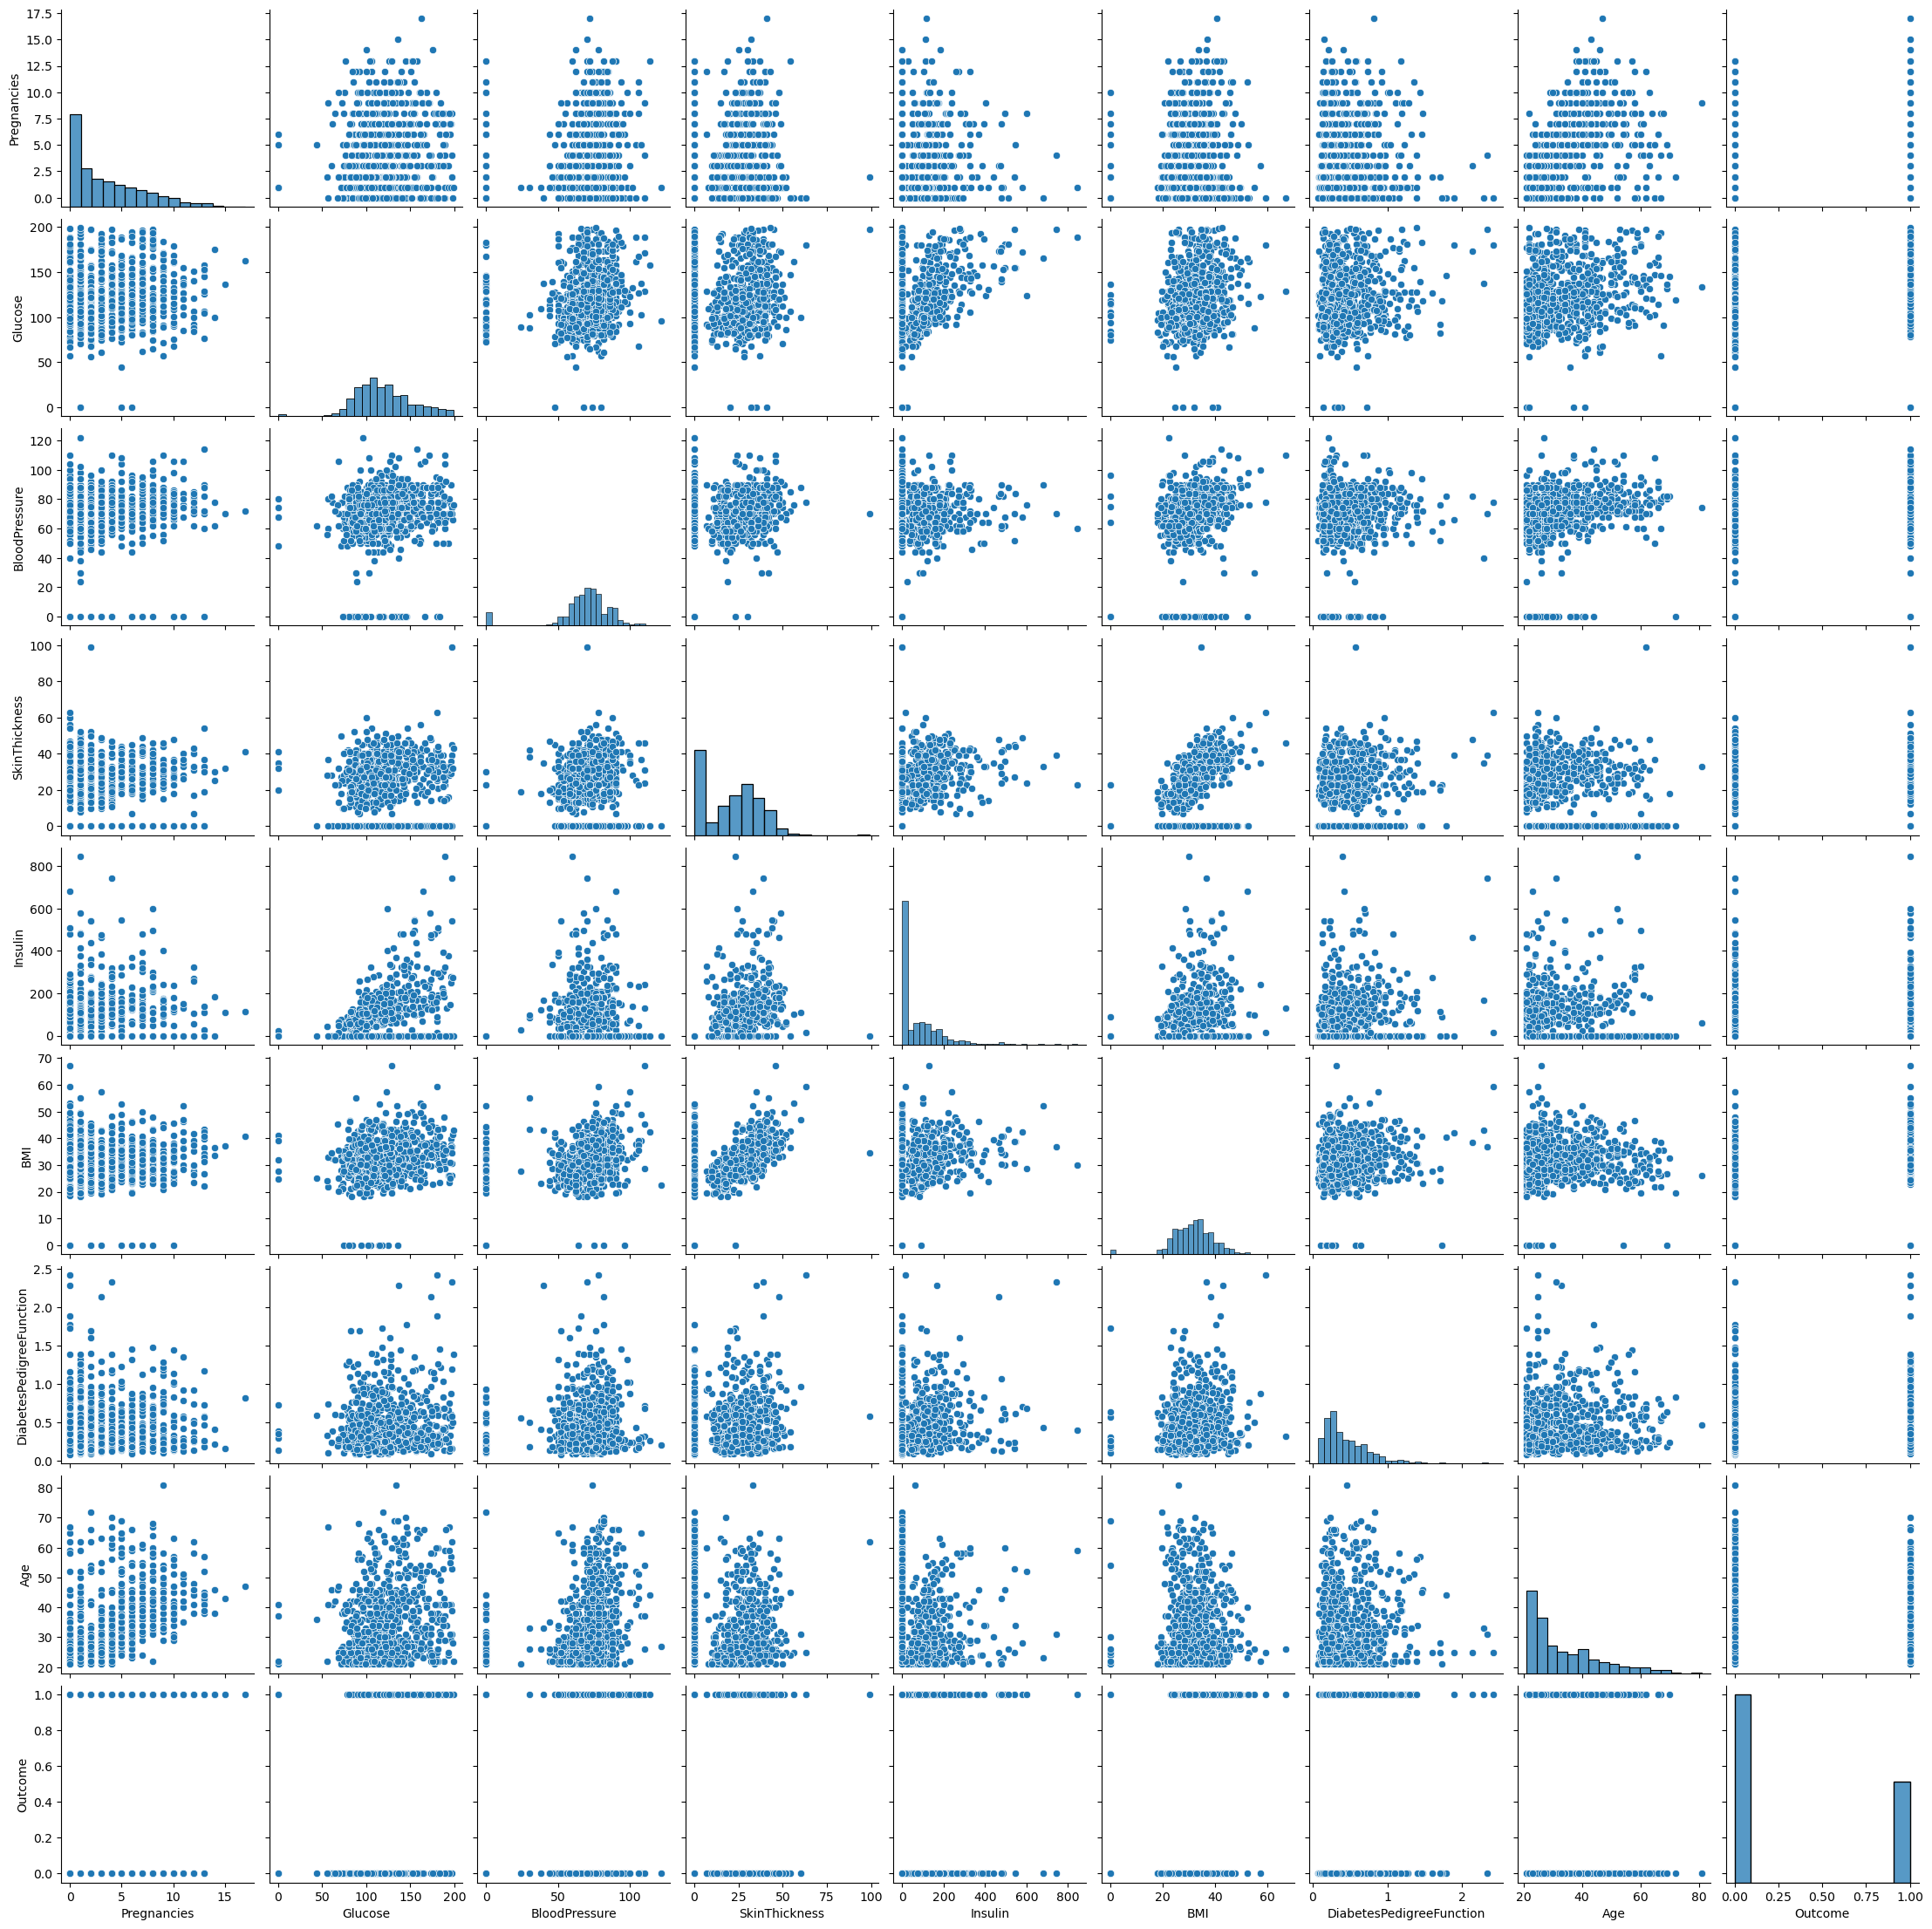

In [34]:
sns.pairplot(diabetes)

C:\Users\ABHISHEK\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ABHISHEK\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\ABHISHEK\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\ABHISHEK\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_n

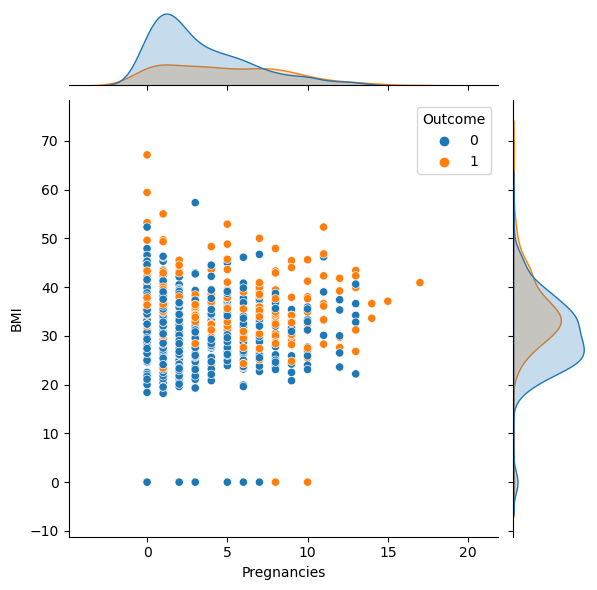

In [37]:
sns.jointplot(x = 'Pregnancies',y = 'BMI',hue = 'Outcome',data=diabetes)

C:\Users\ABHISHEK\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ABHISHEK\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\ABHISHEK\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\ABHISHEK\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_n

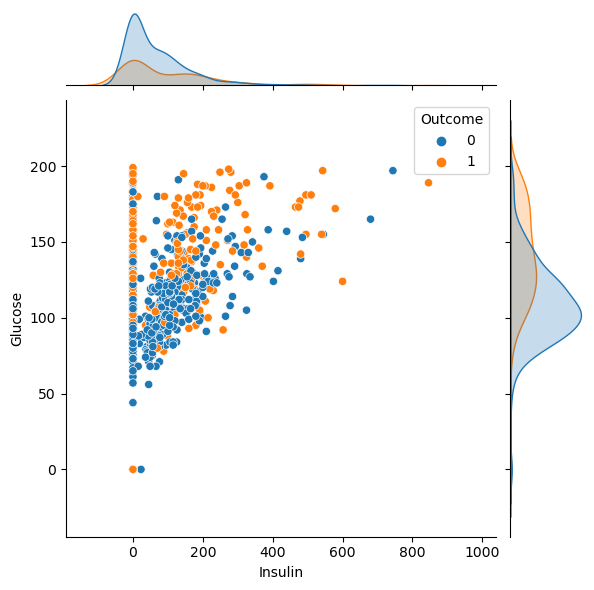

In [38]:
sns.jointplot(x = 'Insulin',y = 'Glucose',hue = 'Outcome',data=diabetes)

C:\Users\ABHISHEK\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ABHISHEK\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\ABHISHEK\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\ABHISHEK\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_n

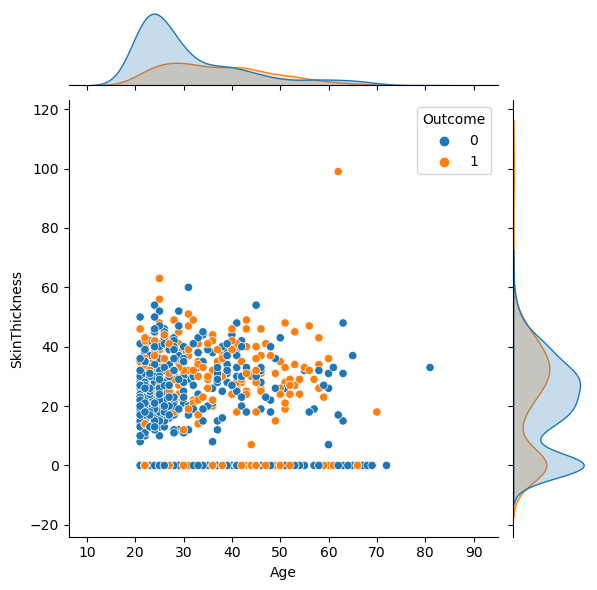

In [39]:
sns.jointplot(x = 'Age',y = 'SkinThickness',hue = 'Outcome',data=diabetes)

<Axes: xlabel='Outcome', ylabel='BloodPressure'>

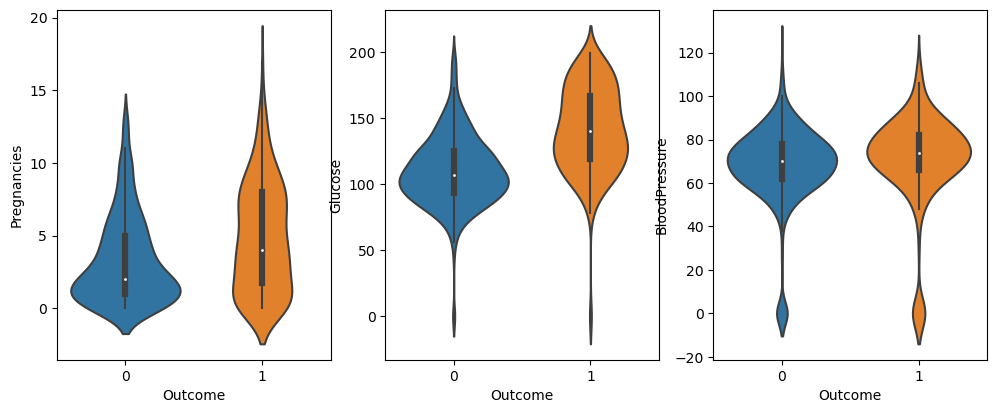

In [40]:
plt.figure(figsize = (12,10))
plt.subplot(2,3,1)
sns.violinplot(x = 'Outcome',y ='Pregnancies',data = diabetes)
plt.subplot(2,3,2)
sns.violinplot(x = 'Outcome',y ='Glucose',data = diabetes)
plt.subplot(2,3,3)
sns.violinplot(x = 'Outcome',y ='BloodPressure',data = diabetes)


<Axes: xlabel='Outcome', ylabel='BMI'>

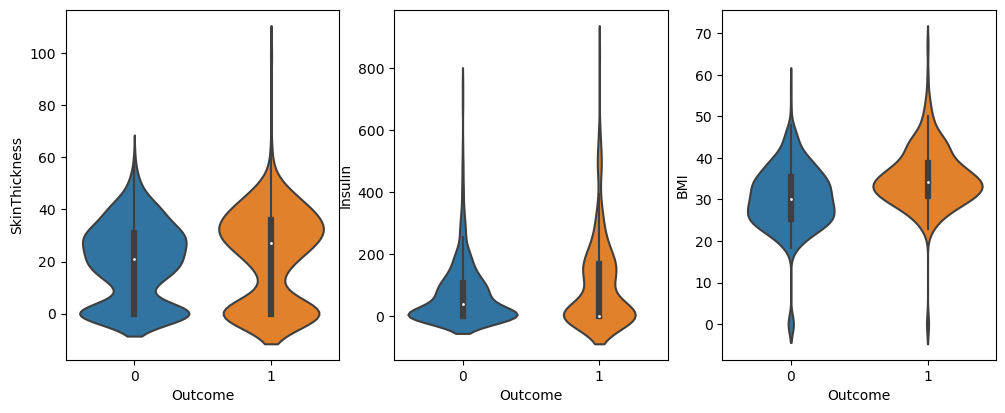

In [41]:
plt.figure(figsize = (12,10))
plt.subplot(2,3,1)
sns.violinplot(x = 'Outcome',y ='SkinThickness',data = diabetes)
plt.subplot(2,3,2)
sns.violinplot(x = 'Outcome',y ='Insulin',data = diabetes)
plt.subplot(2,3,3)
sns.violinplot(x = 'Outcome',y ='BMI',data = diabetes)

<Axes: xlabel='Outcome', ylabel='Age'>

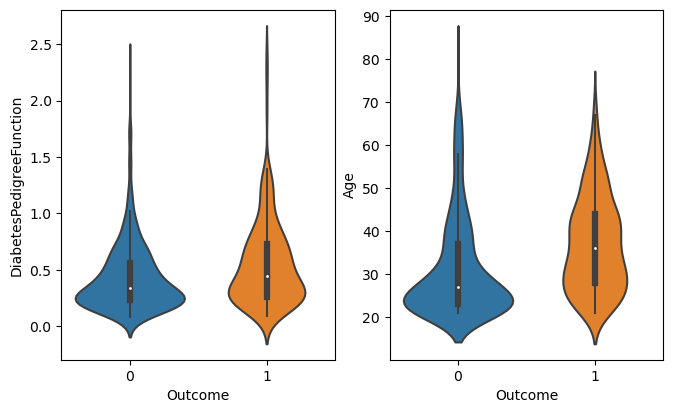

In [42]:
plt.figure(figsize = (12,10))
plt.subplot(2,3,1)
sns.violinplot(x = 'Outcome',y ='DiabetesPedigreeFunction',data = diabetes)
plt.subplot(2,3,2)
sns.violinplot(x = 'Outcome',y ='Age',data = diabetes)

C:\Users\ABHISHEK\AppData\Local\Temp\ipykernel_26880\2833948498.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x = 'Outcome',shade = True,data = diabetes)
C:\Users\ABHISHEK\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Outcome', ylabel='Density'>

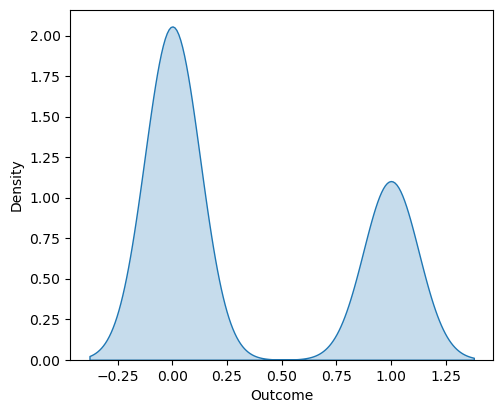

In [43]:
plt.figure(figsize = (12,10))
plt.subplot(2,2,1)
sns.kdeplot(x = 'Outcome',shade = True,data = diabetes)

NameError: name 'andrews_curves' is not defined

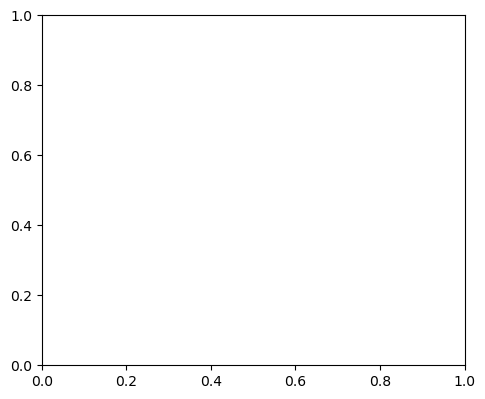

In [44]:
plt.figure(figsize = (12,10))
plt.subplot(2,2,1)
andrews_curves(diabetes,'Outcome')
plt.subplot(2,2,2)
andrews_curves(diabetes,'Pregnancies')
plt.subplot(2,2,3)
andrews_curves(diabetes,'BloodPressure')


NameError: name 'andrews_curves' is not defined

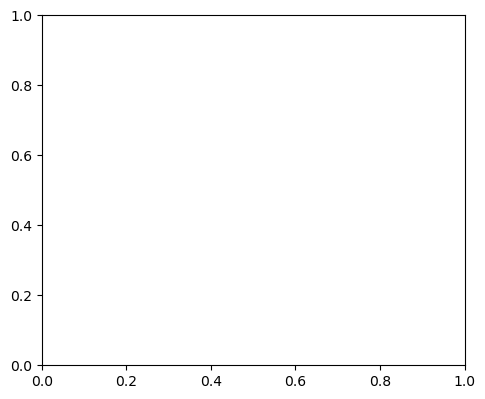

In [45]:
plt.figure(figsize = (12,10))
plt.subplot(2,2,1)
andrews_curves(diabetes,'SkinThickness')
plt.subplot(2,2,2)
andrews_curves(diabetes,'Insulin')
plt.subplot(2,2,3)
andrews_curves(diabetes,'BMI')


NameError: name 'andrews_curves' is not defined

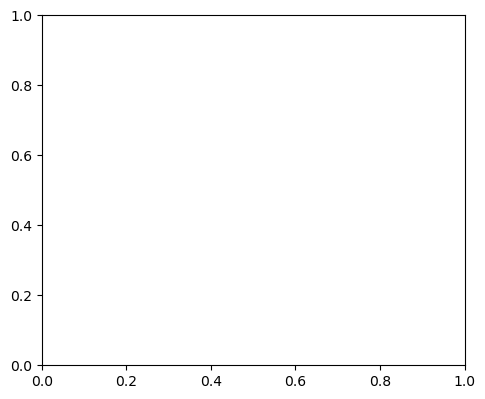

In [46]:
plt.figure(figsize = (12,10))
plt.subplot(2,2,1)
andrews_curves(diabetes,'Age')
plt.subplot(2,2,2)
andrews_curves(diabetes,'DiabetesPedigreeFunction')

<Axes: >

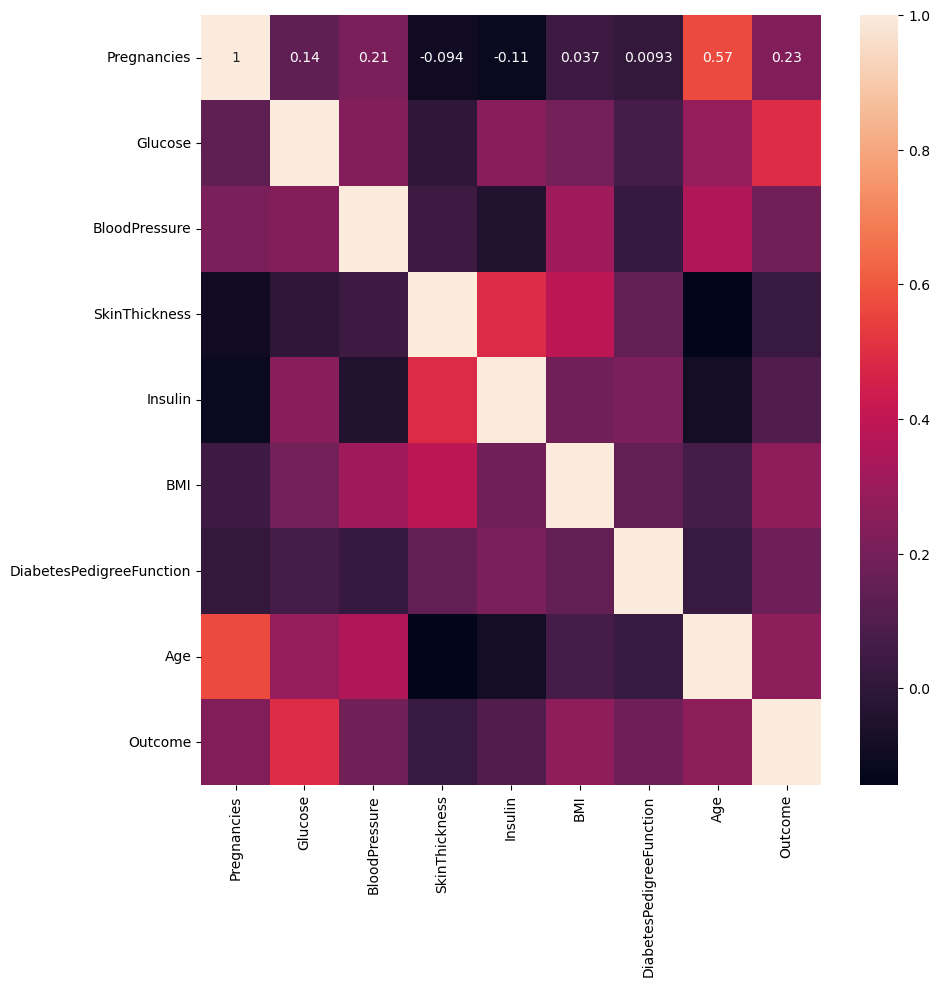

In [47]:
plt.figure(figsize = (10,10))
sns.heatmap(cleaned_data.corr(),annot = True)

In [48]:
x = cleaned_data.drop('Outcome',axis = 1)
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
5,5,116,74,0,0,25.6,0.201,30
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [49]:
y = cleaned_data['Outcome']
y

0      1
1      0
2      1
3      0
5      0
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 639, dtype: int64

In [50]:
from imblearn.over_sampling import SMOTE

In [51]:
smote = SMOTE(random_state = 42)


In [52]:
x_resampled, y_resampled = smote.fit_resample(x, y)

In [53]:
x_train,x_test,y_train,y_test = train_test_split(x_resampled, y_resampled, test_size=0.3, random_state=42)


In [54]:
x_resampled.shape,x_train.shape,x_test.shape,y_train.shape,y_test.shape,y_resampled.shape

((878, 8), (614, 8), (264, 8), (614,), (264,), (878,))

In [55]:
model = LogisticRegression()

In [56]:
model.fit(x_train,y_train)

C:\Users\ABHISHEK\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [57]:
train_data_predict = model.predict(x_train)
train_data_accuracy = accuracy_score(train_data_predict,y_train)
print('Accuracy of training data',train_data_accuracy)

Accuracy of training data 0.739413680781759


In [58]:
test_data_predict = model.predict(x_test)

In [59]:


test_data_accuracy = accuracy_score(test_data_predict,y_test)
print('Accuracy of test data:',test_data_accuracy)

Accuracy of test data: 0.7765151515151515


In [60]:
CMX = confusion_matrix(test_data_predict,y_test)
print(CMX)

[[107  33]
 [ 26  98]]


In [61]:
print(classification_report(test_data_predict,y_test))

              precision    recall  f1-score   support

           0       0.80      0.76      0.78       140
           1       0.75      0.79      0.77       124

    accuracy                           0.78       264
   macro avg       0.78      0.78      0.78       264
weighted avg       0.78      0.78      0.78       264



In [62]:
new_data =(6,148,72,35,0,33.6,0.627,50)
new_data_as_np = np.asarray(new_data)
new_data_reshaped = new_data_as_np.reshape(1,-1)

prediction = model.predict(new_data_reshaped)



print(f"Prediction: {prediction[0]}")

# Adjusted logic
if prediction[0] == 0:
    print('0')
else:
    print('1')


Prediction: 1
1


C:\Users\ABHISHEK\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
new_data_df = pd.DataFrame(new_data, columns=X_train.columns)